In [2]:
import numpy as np
import pandas as pd

directory = ''
file = 'pseudo_facebook.csv'
df = pd.read_csv(file)

In [3]:
#Remove outliers
df = df[df["likes"] < 202]
df = df[ df["likes_received"] < 147]
df = df[df["friendships_initiated"] < 268]
df = df[df["friend_count"] < 469]

In [4]:
#Calculate success 
df['success'] = (df['likes'] + df["friend_count"]) / (df["likes_received"] + df["friendships_initiated"])

In [5]:
#Remove infinity and NaN
df['success'] = df["success"].replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['success'])

In [6]:
#Create tiers based on tenure (account age)
bin_labels = ["Noob", "Rookie", "Veteran", "Early Adopter"]
df["tier"], bin_edges = pd.qcut(df['tenure'], q=4, labels=bin_labels, retbins=True)

In [7]:
#Create new DataFrame for desired results
results = pd.DataFrame(columns=['avg_success', 'tenure', 'tier'])
for label in bin_labels:
    label_df = df.loc[df['tier'] == label]
    results = results.append({'avg_success':label_df['success'].mean(), 'tier':label, 'tenure':label_df['tenure'].mean()}, ignore_index=True)

In [8]:
#Generate pearson correlation
corr = results.corr(method="pearson")

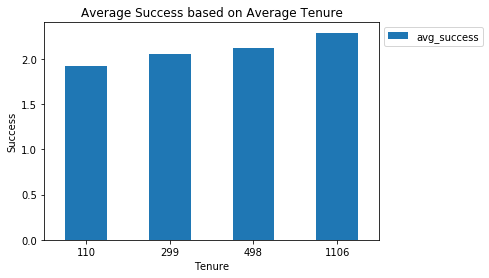

In [21]:
# Plot chart
x = np.arange(len(results['tenure']))  # the label locations
ax = results.plot.bar(x='tenure', y='avg_success', rot=0)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Success')
ax.set_title('Average Success based on Average Tenure')
ax.set_xticks(x)
ax.set_xticklabels(results['tenure'].astype('int64'))
ax.set_xlabel('Tenure')

ax.legend(bbox_to_anchor=(1, 1), loc='best', ncol=1)